# Tarea 6. Distribución óptima de capital y selección de portafolios.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/en/f/f3/SML-chart.png" width="400px" height="400px" />

**Resumen.**
> En esta tarea, tendrás la oportunidad de aplicar los conceptos y las herramientas que aprendimos en el módulo 3. Específicamente, utilizarás técnicas de optimización media-varianza para construir la frontera de mínima varianza, encontrar el mejor portafolio sobre la frontera mínima varianza, y finalmente, identificar la asignación óptima de capital para un inversionista dado su nivel de averisón al riesgo.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea6_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea6_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Considere los siguientes datos de bonos, índice de acciones, mercados desarrollados, mercados emergentes, fondos privados, activos reales y activos libres de riesgo:

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['Bonos', 'Acciones', 'Desarrollado', 'Emergente', 'Privados', 'Real', 'Libre_riesgo'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.0400, 0.1060, 0.0830, 0.1190, 0.1280, 0.0620, 0.0300])
annual_ret_summ.loc['Volatilidad'] = np.array([0.0680, 0.2240, 0.2210, 0.3000, 0.2310, 0.0680, 0.0000])

annual_ret_summ.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real,Libre_riesgo
Media,0.04,0.106,0.083,0.119,0.128,0.062,0.03
Volatilidad,0.068,0.224,0.221,0.3,0.231,0.068,0.0


In [3]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.4000, 0.2500, 0.2000, 0.1500, 0.2000],
                                    [0.4000, 1.0000, 0.7000, 0.6000, 0.7000, 0.2000],
                                    [0.2500, 0.7000, 1.0000, 0.7500, 0.6000, 0.1000],
                                    [0.2000, 0.6000, 0.7500, 1.0000, 0.2500, 0.1500],
                                    [0.1500, 0.7000, 0.6000, 0.2500, 1.0000, 0.3000],
                                    [0.2000, 0.2000, 0.1000, 0.1500, 0.3000, 1.0000]]),
                    columns=annual_ret_summ.columns[:-1], index=annual_ret_summ.columns[:-1])
corr.round(4)

,Bonos,Acciones,Desarrollado,Emergente,Privados,Real
Bonos,1.00,0.4,0.25,0.20,0.15,0.20
Acciones,0.40,1.0,0.70,0.60,0.70,0.20
Desarrollado,0.25,0.7,1.00,0.75,0.60,0.10
Emergente,0.20,0.6,0.75,1.00,0.25,0.15
Privados,0.15,0.7,0.60,0.25,1.00,0.30
Real,0.20,0.2,0.10,0.15,0.30,1.00


1. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (10 puntos).

Text(0, 0.5, '$E[x]$')

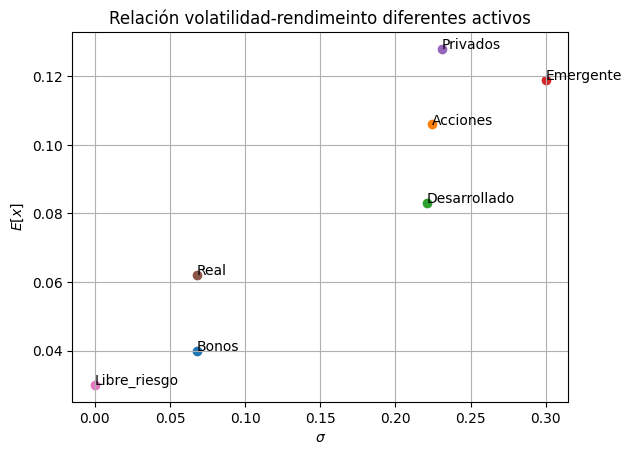

In [4]:
plt.figure()

for i in range(len(annual_ret_summ.T)):
    flag_paises = annual_ret_summ.T.iloc[i]
    name = annual_ret_summ.T.index[i]
    plt.scatter(flag_paises["Volatilidad"], flag_paises["Media"])
    plt.text(flag_paises["Volatilidad"], flag_paises["Media"], name)

plt.grid()
plt.title("Relación volatilidad-rendimeinto diferentes activos")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

## 2. Hallando portafolios sobre la frontera de mínima varianza (35 puntos)

Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio
2. Halle los pesos del portafolio EMV considerando todos los activos riesgosos. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio

In [5]:
rf = annual_ret_summ.loc["Media", "Libre_riesgo"]
annual_ret_summ2 = annual_ret_summ.drop("Libre_riesgo", axis=1)

In [6]:
S = np.diag(annual_ret_summ2.loc["Volatilidad"]).astype(float)
S

array([[0.068, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.224, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.221, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.3  , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.231, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.068]])

In [7]:
sigma = S.dot(corr).dot(S)
sigma

array([[0.004624 , 0.0060928, 0.003757 , 0.00408  , 0.0023562, 0.0009248],
       [0.0060928, 0.050176 , 0.0346528, 0.04032  , 0.0362208, 0.0030464],
       [0.003757 , 0.0346528, 0.048841 , 0.049725 , 0.0306306, 0.0015028],
       [0.00408  , 0.04032  , 0.049725 , 0.09     , 0.017325 , 0.00306  ],
       [0.0023562, 0.0362208, 0.0306306, 0.017325 , 0.053361 , 0.0047124],
       [0.0009248, 0.0030464, 0.0015028, 0.00306  , 0.0047124, 0.004624 ]])

In [8]:
e1 = annual_ret_summ2['Bonos'].loc['Media']
e2 = annual_ret_summ2['Acciones'].loc['Media']
e3 = annual_ret_summ2['Desarrollado'].loc['Media']
e4 = annual_ret_summ2['Emergente'].loc['Media']
e5 = annual_ret_summ2['Privados'].loc['Media']
e6 = annual_ret_summ2['Real'].loc['Media']

eind = np.array([e1, e2, e3, e4, e5, e6])

def varianza(w, sigma):
    return w.T.dot(sigma).dot(w)

def rendimiento_req(w, Eind, mu_req):
    return w.T.dot(Eind) - mu_req

def weights_equal_1(w):
    return np.sum(w) - 1

N = 100

portfolio_6 = pd.DataFrame(index=range(N), columns=['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'media', 'vol', 'sharpe'])

ereq = np.linspace(eind.min(), eind.max(), N)

# Para cada rendimiento entre el mínimo y máximo posible ... ¿cuáles son los pesoso con mínima varianza?
for i in range(len(ereq)):
    # Restricciones
    cons = (
        # Rendimiento requerido
        {'type': 'eq', 'fun': rendimiento_req, 'args': (eind, ereq[i])},
        # Los pesos tienne que ser 1
        {'type': 'eq', 'fun': weights_equal_1}
    )
    # Portafolio de mínima varianza para nivel de rendimiento esperado Ereq[i]
    min_var = minimize(fun=varianza,
                       x0=np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]),
                       args=(sigma,),
                       bounds=((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                       constraints=cons
                      )
    # Pesos, rendimientos y volatilidades de los portafolio
    portfolio_6.loc[i, ['w1', 'w2', 'w3', 'w4', 'w5', 'w6']] = min_var.x

    portfolio_6['media'][i] = eind.dot(min_var.x)
    portfolio_6['vol'][i] = np.sqrt(varianza(min_var.x, sigma))
    portfolio_6['sharpe'] = (portfolio_6["media"] - rf) / portfolio_6["vol"]

portfolio_6

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.04,0.068,0.147059
1,0.959596,0.0,0.0,0.0,0.0,0.040404,0.040889,0.065857,0.165341
2,0.919192,0.0,0.0,0.0,0.0,0.080808,0.041778,0.063832,0.184514
3,0.878788,0.0,0.0,0.0,0.0,0.121212,0.042667,0.061935,0.204516
4,0.838384,0.0,0.0,0.0,0.0,0.161616,0.043556,0.060179,0.225253
...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.278406,0.705686,0.015908,0.124444,0.201224,0.46935
96,0.0,0.0,0.0,0.282136,0.715933,0.001931,0.125333,0.203789,0.467803
97,0.0,0.0,0.0,0.197531,0.802469,0.0,0.126222,0.208246,0.462061
98,0.0,0.0,0.0,0.098765,0.901235,0.0,0.127111,0.217493,0.446502


In [9]:
# Portafolio de mínima varianza
cons = ({'type': 'eq', 'fun': weights_equal_1},)
min_var6 = minimize(varianza,
                    x0=np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6]),
                    args=(sigma,),
                    bounds=((0,1), (0,1), (0,1), (0,1), (0,1), (0,1)),
                    constraints=cons)
w_minvar = min_var6.x

print("En el portafolio de mínima varianza con los 6 activos, el peso de los Bonos es de " + str(np.round(w_minvar[0] * 100, 2)) +
      "%, el de las Acciones es de " + str(np.round(w_minvar[1] * 100, 2)) + "%, \nel de los Desarrollados es de " + str(np.round(w_minvar[2] * 100, 2)) +
      "%, el de los Emergentes es de " + str(np.round(w_minvar[3] * 100, 2)) + "% el de los Privados es de " + str(np.round(w_minvar[4] * 100, 2)) +
      "%, y el Real es de " + str(np.round(w_minvar[5] * 100, 2)) + "%.")

En el portafolio de mínima varianza con los 6 activos, el peso de los Bonos es de 49.51%, el de las Acciones es de 0.0%, 
el de los Desarrollados es de 0.02%, el de los Emergentes es de 0.0% el de los Privados es de 0.0%, y el Real es de 50.46%.


In [10]:
e_minvar = eind.dot(w_minvar)
s_minvar = np.sqrt(varianza(w_minvar, sigma))
sharpe_minvar = (e_minvar - rf) / s_minvar

print("El rendimiento esperado del portafolio de mínima varianza con los 6 activos, es de " + str(np.round(e_minvar * 100, 4)) +
      "% y la volatilidad es de " + str(np.round(s_minvar * 100, 4)) + "%.\nEl ratio de sharpe es de " + str(np.round(sharpe_minvar, 4)) + ".")

El rendimiento esperado del portafolio de mínima varianza con los 6 activos, es de 5.1111% y la volatilidad es de 5.2674%.
El ratio de sharpe es de 0.4008.


In [11]:
min_var = portfolio_6[portfolio_6.vol == portfolio_6.vol.min()]
min_var

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
13,0.480905,0.0,0.006451,0.0,0.0,0.512644,0.051556,0.052686,0.409129


In [12]:
emv = portfolio_6[portfolio_6.sharpe == portfolio_6.sharpe.max()]
emv

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
42,0.003191,0.0,0.0,0.080966,0.163461,0.752381,0.077333,0.081443,0.581186


In [13]:
print("En el portafolio de máximo ratio de sharpe con los 6 activos, el peso de los Bonos es de " + str(np.round(emv["w1"].values[0] * 100, 2)) +
      "%, el de las Acciones es de " + str(np.round(emv["w2"].values[0] * 100, 2)) + "%, \nel de los Desarrollados es de " +
      str(np.round(emv["w3"].values[0] * 100, 2)) + "%, el de los Emergentes es de " + str(np.round(emv["w4"].values[0] * 100, 2)) +
      "% el de los Privados es de " + str(np.round(emv["w5"].values[0] * 100, 2)) + "%, y el Real es de " + str(np.round(emv["w6"].values[0] * 100, 2)) + "%.")

En el portafolio de máximo ratio de sharpe con los 6 activos, el peso de los Bonos es de 0.32%, el de las Acciones es de 0.0%, 
el de los Desarrollados es de 0.0%, el de los Emergentes es de 8.1% el de los Privados es de 16.35%, y el Real es de 75.24%.


In [14]:
print("El rendimiento esperado del portafolio de máximo ratio de sharpe con los 6 activos, es de " + str(np.round(emv["media"].values[0] * 100, 4)) +
      "% y la volatilidad es de " + str(np.round(emv["vol"].values[0] * 100, 4)) + "%.\nEl ratio de sharpe es de " +
      str(np.round(emv["sharpe"].values[0], 4)) + ".")

El rendimiento esperado del portafolio de máximo ratio de sharpe con los 6 activos, es de 7.7333% y la volatilidad es de 8.1443%.
El ratio de sharpe es de 0.5812.


## 3. Frontera de mínima varianza y LAC (30 puntos)

Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (15 puntos).

In [15]:
portfolio_6

,w1,w2,w3,w4,w5,w6,media,vol,sharpe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.04,0.068,0.147059
1,0.959596,0.0,0.0,0.0,0.0,0.040404,0.040889,0.065857,0.165341
2,0.919192,0.0,0.0,0.0,0.0,0.080808,0.041778,0.063832,0.184514
3,0.878788,0.0,0.0,0.0,0.0,0.121212,0.042667,0.061935,0.204516
4,0.838384,0.0,0.0,0.0,0.0,0.161616,0.043556,0.060179,0.225253
...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.278406,0.705686,0.015908,0.124444,0.201224,0.46935
96,0.0,0.0,0.0,0.282136,0.715933,0.001931,0.125333,0.203789,0.467803
97,0.0,0.0,0.0,0.197531,0.802469,0.0,0.126222,0.208246,0.462061
98,0.0,0.0,0.0,0.098765,0.901235,0.0,0.127111,0.217493,0.446502


In [16]:
gamma = np.linspace(1, 10, 10)

lac_emv = pd.DataFrame({
    "gamma": gamma,
    "w_acciones": (emv.media.iloc[0] - rf) / (gamma * emv.vol.iloc[0]**2)
})

lac_emv["w_boss"] = 1-lac_emv.w_acciones

media_lac = lac_emv.w_acciones * emv.media.values[0] + lac_emv.w_boss * rf
vol_lac = lac_emv.w_acciones * emv.vol.values[0]

media = []
vol = []

for i in range(len(media_lac)):
    media.append(media_lac.values[i])
    vol.append(vol_lac.values[i])

lac_emv["media"] = media
lac_emv["vol"] = vol

lac_emv

,gamma,w_acciones,w_boss,media,vol
0,1.0,7.136147,-6.136147,0.367778,0.581186
1,2.0,3.568073,-2.568073,0.198889,0.290593
2,3.0,2.378716,-1.378716,0.142593,0.193729
3,4.0,1.784037,-0.784037,0.114444,0.145297
4,5.0,1.427229,-0.427229,0.097556,0.116237
5,6.0,1.189358,-0.189358,0.086296,0.096864
6,7.0,1.019450,-0.019450,0.078254,0.083027
7,8.0,0.892018,0.107982,0.072222,0.072648
8,9.0,0.792905,0.207095,0.067531,0.064576
9,10.0,0.713615,0.286385,0.063778,0.058119


## 4. Gráficos y conclusiones (25 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría?, ¿qué significa su resultado?(10 puntos)

In [17]:
s = np.linspace(0,0.17,10)
lac= rf+s*emv.sharpe.iloc[0]

Text(0, 0.5, '$E[x]$')

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:758: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:898: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y)

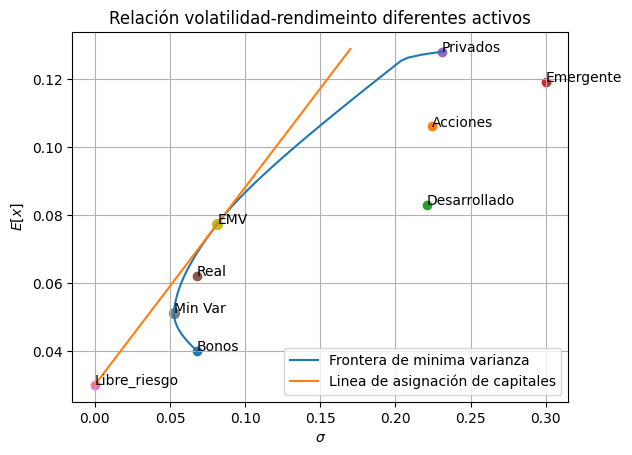

In [18]:
plt.figure()

for i in range(len(annual_ret_summ.T)):
    flag_paises = annual_ret_summ.T.iloc[i]
    name = annual_ret_summ.T.index[i]
    plt.scatter(flag_paises["Volatilidad"], flag_paises["Media"])
    plt.text(flag_paises["Volatilidad"], flag_paises["Media"], name)

plt.scatter(s_minvar, e_minvar, s=50)
plt.text(s_minvar, e_minvar, "Min Var")

plt.scatter(emv.vol, emv.media, s=50)
plt.text(emv.vol, emv.media, "EMV")

plt.plot(portfolio_6.vol, portfolio_6.media, label="Frontera de minima varianza")
plt.plot(s, lac, label="Linea de asignación de capitales")

plt.grid()
plt.legend()
plt.title("Relación volatilidad-rendimeinto diferentes activos")
plt.xlabel("$\sigma$")
plt.ylabel("$E[x]$")

In [19]:
gamma = 4
w_acciones = (emv.media - rf) / (gamma * emv.vol**2)
w_bonos = 1 - w_acciones

print("Teniendo una aversión al riesgo de 4 se recomendaría al cliente que pida prestado, para inviertir el " + str(np.round(w_acciones.values[0] * 100, 4)) +
      "% en acciones y el " + str(np.round(w_bonos.values[0] * 100, 4)) + "% en bonos")

Teniendo una aversión al riesgo de 4 se recomendaría al cliente que pida prestado, para inviertir el 178.4037% en acciones y el -78.4037% en bonos
